# population models

,year,population
0,1790.0,3.9
1,1800.0,5.3
2,1810.0,7.2
3,1820.0,9.6
4,1830.0,12.9
5,1840.0,17.1
6,1850.0,23.2
7,1860.0,31.4
8,1870.0,38.6
9,1880.0,50.2


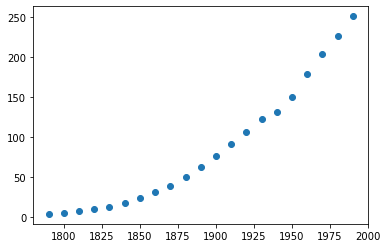

In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt 
from scipy.optimize import curve_fit

import pandas as pd
dataset = pd.DataFrame(pd.read_csv('data.csv'),dtype=float)
data = dataset

plt.scatter(dataset.year,dataset.population)
data.population.diff()
data

In [2]:
data_size = len(data)
year = np.arange(data_size)

def loss(pred,real):
    return np.abs(pred-real)/real

def percentage(x):
    return "%.2f%%" % (x * 100)

def fit_display(f):
    popt, _ = curve_fit(f,year,data.population/1000)
    print('parameters:',popt)
    pred = f(year,*popt)*1000

    result = data.copy()
    result['prediction'] = np.round(pred,2)
    loss_ = loss(pred,data.population)
    result['loss'] = np.asarray(list(map(percentage,loss_)))
    print('loss:',percentage(np.mean(loss_)))

    plt.scatter(data.year,data.population,label='real data')
    plt.plot(data.year,pred,'r-',label = 'prediction')
    plt.legend()

    return result

## model 1
### expression
differential equation:
$$$
\frac{dP}{dt}=\gamma \cdot P
$$$
function:
$$$
P(t) = P_0 \cdot e^{\gamma t}
$$$

parameters: [0.21685414]
loss: 26.96%


,year,population,prediction,loss
0,1790.0,3.9,3.90,0.00%
1,1800.0,5.3,4.84,8.60%
2,1810.0,7.2,6.02,16.42%
3,1820.0,9.6,7.47,22.14%
4,1830.0,12.9,9.28,28.02%
5,1840.0,17.1,11.53,32.55%
6,1850.0,23.2,14.33,38.25%
7,1860.0,31.4,17.80,43.33%
8,1870.0,38.6,22.11,42.73%
9,1880.0,50.2,27.46,45.30%


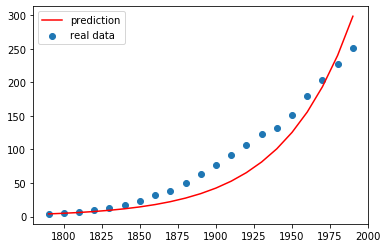

In [3]:
P0 = data.population.iloc[0]/1000
def f1(x,r):
    return P0*np.exp(r*x)

fit_display(f1)

where we calculate the parameter:$\gamma = 0.262$
and loss here:$loss = $

parameters: [0.23722757]


,year,population,prediction,loss
0,1790.0,3.9,3.90,0.00
1,1800.0,5.3,4.94,0.07
2,1810.0,7.2,6.27,0.13
3,1820.0,9.6,7.95,0.17
4,1830.0,12.9,10.07,0.22
5,1840.0,17.1,12.77,0.25
6,1850.0,23.2,16.19,0.30
7,1860.0,31.4,20.52,0.35
8,1870.0,38.6,26.02,0.33
9,1880.0,50.2,32.98,0.34


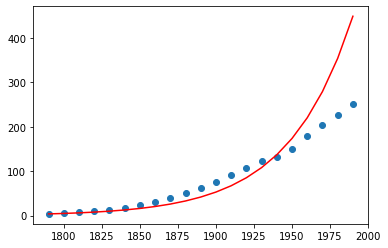

In [18]:
def f11(x,r):
    return np.log(data.population.iloc[0]) + r*x

popt_, _ = curve_fit(f11,year,np.log(data.population))
print('parameters:',popt_)
pred_ = np.exp(f11(year,*popt_))

result_ = data.copy()
result_['prediction'] = np.round(pred_,2)
result_['loss'] = np.round(loss(pred_,data.population),2)

plt.scatter(data.year,data.population,label='real data')
plt.plot(data.year,pred_,'r-',label = 'prediction')
result_

## model 2
### expression
ODE:
$$$
\frac{P}{dt}=\gamma P (1-\frac{P}{\kappa})
$$$
function:
$$$
P(t)=\frac{\kappa P_0 e^{\gamma t}}{\kappa+P_0 e^{\gamma t}}
$$$

parameters: [0.27981712 0.31195548]
loss: 8.04%


,year,population,prediction,loss
0,1790.0,3.9,3.90,0.00%
1,1800.0,5.3,5.14,3.05%
2,1810.0,7.2,6.76,6.09%
3,1820.0,9.6,8.88,7.47%
4,1830.0,12.9,11.64,9.74%
5,1840.0,17.1,15.22,10.99%
6,1850.0,23.2,19.82,14.56%
7,1860.0,31.4,25.70,18.17%
8,1870.0,38.6,33.11,14.22%
9,1880.0,50.2,42.35,15.63%


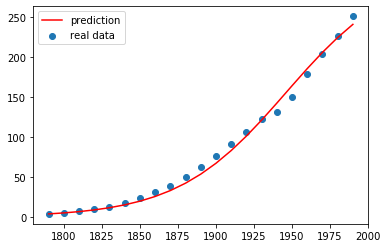

In [4]:
def f2(x,r,K):
    e = np.exp(r*x)
    return (K*P0*e)/(K+P0*(e-1))

fit_display(f2)

## model 3
### formula
ODE:
$$$
\frac{dP}{dt}=\gamma(1-\frac{P}{\kappa + \frac{P}{2}})P
$$$
function:
$$$
P(t)=2[\kappa+\frac{\kappa-\frac{P_0}{2}}{P_0 e^{\gamma t}}(\kappa-\frac{P_0}{2}-\sqrt{2\kappa P_0 e^{\gamma t}+(\kappa-\frac{P_0}{2})^2})]
$$$

parameters: [0.29446449 0.2070968 ]
loss: 5.56%


,year,population,prediction,loss
0,1790.0,3.9,3.90,0.00%
1,1800.0,5.3,5.20,1.85%
2,1810.0,7.2,6.92,3.82%
3,1820.0,9.6,9.19,4.24%
4,1830.0,12.9,12.16,5.74%
5,1840.0,17.1,16.01,6.36%
6,1850.0,23.2,20.96,9.64%
7,1860.0,31.4,27.25,13.22%
8,1870.0,38.6,35.11,9.04%
9,1880.0,50.2,44.76,10.83%


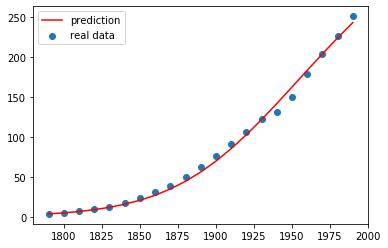

In [5]:
def f3(t,r,k):
    j = k - P0/2
    e = P0*np.exp(r*t)
    return 2*(k+j*(j-np.sqrt(2*k*e+j**2))/e)

fit_display(f3)

In [ ]:
data.